In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [5]:
# Drive link: https://drive.google.com/file/d/1PNN8xQnCv7NA56JTF_igTdem86U_ap9J/view?usp=sharing

!wget https://drive.google.com/uc?id=1PNN8xQnCv7NA56JTF_igTdem86U_ap9J&export=download
!mv uc?id=1PNN8xQnCv7NA56JTF_igTdem86U_ap9J HousingPrices.csv

df = pd.read_csv('HousingPrices.csv')

--2020-11-22 14:03:17--  https://drive.google.com/uc?id=1PNN8xQnCv7NA56JTF_igTdem86U_ap9J
Resolving drive.google.com (drive.google.com)... 142.250.125.138, 142.250.125.113, 142.250.125.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.125.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fgj1bqpmkqdv6hjqs7u4e396n65r4c32/1606053750000/05921581844430197764/*/1PNN8xQnCv7NA56JTF_igTdem86U_ap9J [following]
--2020-11-22 14:03:17--  https://doc-00-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fgj1bqpmkqdv6hjqs7u4e396n65r4c32/1606053750000/05921581844430197764/*/1PNN8xQnCv7NA56JTF_igTdem86U_ap9J
Resolving doc-00-3k-docs.googleusercontent.com (doc-00-3k-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to doc-00-3k-docs.googleusercontent.com (doc-00-3k-docs.googleusercontent.com)|1

In [6]:
df.shape

(1460, 2)

In [7]:
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [8]:
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


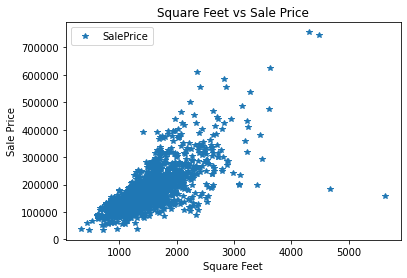

In [9]:
df.plot(x='SquareFeet', y='SalePrice', style='*')
plt.title('Square Feet vs Sale Price')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.show()

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [13]:
lr = LinearRegression().fit(X_train, y_train)
get_cv_scores(lr)

CV Mean:  0.5147052949885541
STD:  0.06563558755274343




In [14]:
print(lr.intercept_)
print(lr.coef_)

13330.293444921088
[110.26434426]


In [15]:
y_pred = lr.predict(X_test)

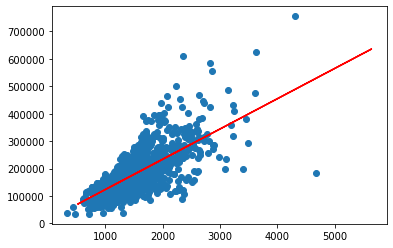

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,200624,290645.119259
1,133000,187327.428687
2,110000,145978.299590
3,192000,236284.797539
4,88000,133738.957377


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 39364.76724953735
Mean Squared Error: 3913788296.4027987
Root Mean Squared Error: 62560.277304394986
